In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Default.csv')
print(df.shape)
df.head()

(10000, 4)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
#changing default to 0 and 1
df['default'] = df['default'].map({'No': 0, 'Yes': 1})
df['student'] = df['student'].map({'No': 0, 'Yes': 1})
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


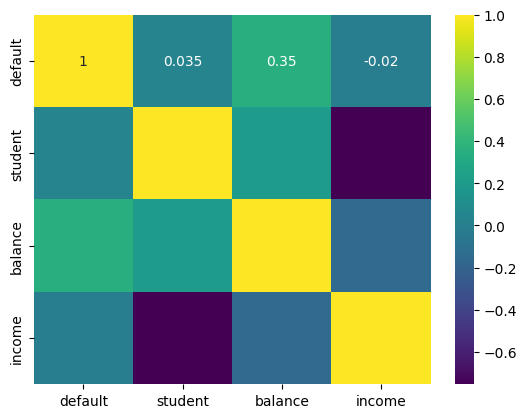

In [20]:
#correlation matrix
df.corr()

#plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()


In [21]:
#dropping student because it is correlated with income
df = df.drop('student', axis=1)

In [22]:
#defualt count and percentage
default_percent = df['default'].value_counts(normalize=True)
print(default_percent)


default
0    0.9667
1    0.0333
Name: proportion, dtype: float64


In [23]:
#train test split stratified
from sklearn.model_selection import train_test_split
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [24]:
#Cheking whether the split is stratified
default_percent_train = y_train.value_counts(normalize=True)
default_percent_test = y_test.value_counts(normalize=True)
print(default_percent_train, default_percent_test)

default
0    0.96675
1    0.03325
Name: proportion, dtype: float64 default
0    0.9665
1    0.0335
Name: proportion, dtype: float64


In [28]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [39]:
#save X_train to csv
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.to_csv('X_train.csv', index=False)



In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


#Making a DataFrame of the coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
})

intercept_row = {'feature': 'intercept', 'coefficient': log_reg.intercept_[0]}
coef_df = pd.concat([coef_df, pd.DataFrame([intercept_row])], ignore_index=True)

coef_df


Accuracy: 0.9735


/Users/krishan/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,feature,coefficient
0,balance,2.667965
1,income,0.196217
2,intercept,-6.041175
